In [34]:
import os 
import matplotlib.pyplot as plt 
import cv2
import numpy as np  
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop


In [35]:
dataset_path = "Datasets/Brain Tumor Data Set"

In [36]:
categories = ["Healthy",'Brain_Tumor']

In [37]:
data = []
labels=[]

image_size = 128

In [38]:
type(data)

list

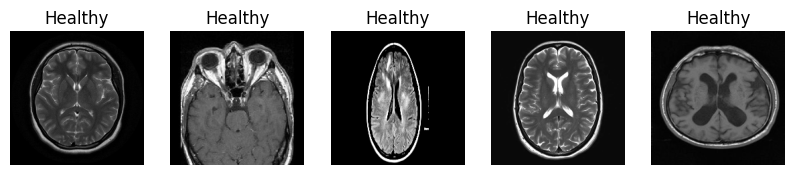

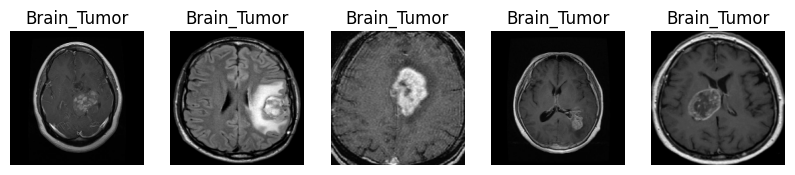

In [39]:
for category in categories:
    folder_path = os.path.join(dataset_path,category)
    image_files = os.listdir(folder_path)[:5]

    plt.figure(figsize=(10,6))
    for i ,img_name in enumerate(image_files):
        img_path = os.path.join(folder_path,img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image,(200,200))
        plt.subplot(1,5,i+1)
        plt.imshow(image,cmap= "gray")
        plt.title(category)
        plt.axis("off")

    
    plt.show()

In [40]:
for category in categories:
    folder_path = os.path.join(dataset_path,category)
    label = categories.index(category)

    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path,image_name)
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv2.resize(image,(image_size,image_size))
            image = image/255.0

            data.append(image)
            labels.append(label)


data = np.array(data).reshape(-1,image_size,image_size,1)
labels = np.array(labels)


X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state = 42)

In [41]:
# from sklearn.model_selection import StratifiedShuffleSplit
# sss = StratifiedShuffleSplit(n_splits= 1 ,test_size= 0.2, random_state=42)

# for train_idx,test_idx in sss.split(data,labels):
#     X_train, X_test = data[train_idx], data[test_idx]
#     y_train, y_test = labels[train_idx], labels[test_idx]

In [42]:
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)

Training Data Shape: (3680, 128, 128, 1)
Testing Data Shape: (920, 128, 128, 1)
Training Labels Shape: (3680,)
Testing Labels Shape: (920,)


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32

datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images randomly by 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20%
    height_shift_range=0.2, # Shift images vertically by 20%
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill pixels after transformation
)
val_datagen = ImageDataGenerator()  # No augmentation for validation data
val_generator = val_datagen.flow(X_test, y_test, batch_size=batch_size)

In [44]:
datagen.fit(X_train)

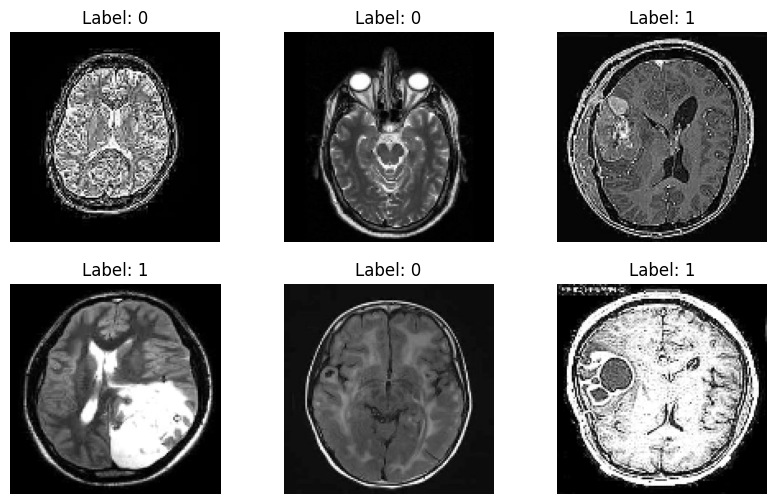

In [45]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i].reshape(128, 128), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.show()

In [46]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),  # First Conv Layer
    MaxPooling2D((2,2)),  # Pooling Layer
    
    Conv2D(64, (3,3), activation='relu'),  # Second Conv Layer
    MaxPooling2D((2,2)),  

    Conv2D(128,(3,3),activation = 'relu'),# third ConvLayer
    MaxPooling2D((2,2)),

    Conv2D(256,(3,3),activation = 'relu'),# 4th ConvLayer
    MaxPooling2D((2,2)),
    

    Flatten(),  # Flatten the feature maps into a 1D vector
    
    Dense(128, activation='relu'),  # Fully Connected Layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)), 
    Dense(1, activation='sigmoid')  # Output Layer (1 neuron for binary classification)
])

model.summary()  # Print model architecture


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,584,257 (6.04 MB)

 Trainable params: 1,584,257 (6.04 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
optimizer = RMSprop(learning_rate= 0.001)#root mean square propogation best for CNN and RNN

In [48]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
batch_size = 32

train_generator = datagen.flow(X_train,y_train,batch_size = batch_size)

history = model.fit(train_generator, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.5415 - loss: 1.4098 - val_accuracy: 0.5283 - val_loss: 0.7363
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.5634 - loss: 0.7061 - val_accuracy: 0.6489 - val_loss: 0.6737
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 175ms/step - accuracy: 0.5904 - loss: 0.6791 - val_accuracy: 0.6837 - val_loss: 0.6154
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 169ms/step - accuracy: 0.6448 - loss: 0.6430 - val_accuracy: 0.7315 - val_loss: 0.5569
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 165ms/step - accuracy: 0.6953 - loss: 0.5985 - val_accuracy: 0.7804 - val_loss: 0.5100
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.7249 - loss: 0.5575 - val_accuracy: 0.8185 - val_loss: 0.4434
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.7664 - loss: 0.5018 - val_accuracy: 0.7620 - val_loss: 0.4590
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.7760 - loss: 0

In [50]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8836 - loss: 0.2957
Test Accuracy: 89.02%


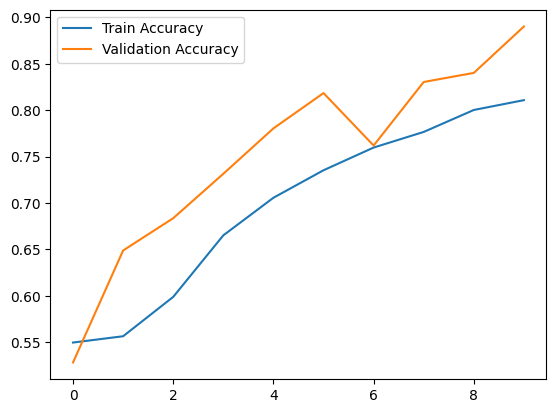

In [51]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

<h3>1.If validation accuracy is much lower than training accuracy, the model might be overfitting.</h3>
<h3>2.If loss does not decrease over epochs, the model might not be learning properly.</h3>


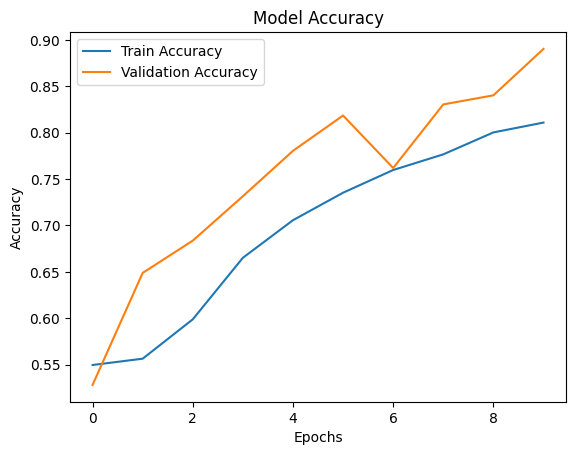

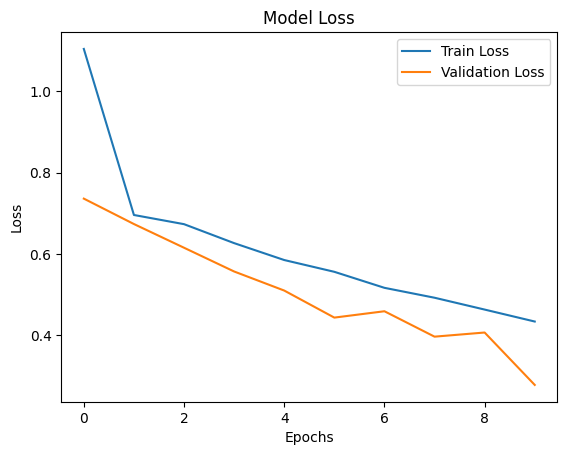

In [52]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [53]:
model.save("brain_tumor_model.h5")
